## Loading the environments

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

# Importing packages

In [24]:
from dotenv import load_dotenv
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from IPython.display import Image, display
from langgraph.graph import StateGraph , START , END , MessageGraph 
from langchain_core.messages import HumanMessage , AIMessage , SystemMessage
from typing import TypedDict


In [3]:
model = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

In [6]:
model.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm doing well, thank you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-ByaYhf3dn4SQLOmBlIn8kIg8eJC31', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--1753cfbf-caf6-442c-8ad9-2f405bc8af61-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## Some utility functions

In [8]:

# to display the graph
def display_graph(app):
    # this function will display the graph of the app
    try:
        display(Image(app.get_graph().draw_mermaid_png()))
    except Exception as e:
        # This requires some extra dependencies and is optional
        print(e)



# To stream the output of the app
def stream_output(app, input):
    for output in app.stream(input):
        for key,value in output.items():
            print(f"here is output from {key}")
            print("_______")
            print(value)
            print("\n")

In [29]:
# 1. Define the state
class State(TypedDict):
    # This is a dictionary that will store the state of the workflow
    message: str

## Level 1: Simple Workflow in a graph

In [30]:
def greet_user(state):
    '''
    This function will greet the user with a message
    '''
    # Use the 'message' from the state dictionary
    user_message = state.get("message", "")
    return {"message": f"Hello {user_message}!"}


def convert_to_uppercase(state):
    '''
    This function will convert the input word in the state to uppercase
    '''
    state["message"] = state["message"].upper()
    return state

In [31]:
#define the workflow

workflow = StateGraph(State)
workflow.add_node("User_greetings" , greet_user)
workflow.add_node("Uppercase_converter" , convert_to_uppercase)
workflow.add_edge(START , "User_greetings")
workflow.add_edge("User_greetings" , "Uppercase_converter")
workflow.add_edge("Uppercase_converter" , END)
app = workflow.compile()




In [33]:
result = app.invoke({"message": "Suman"})

In [34]:
print(result)

{'message': 'HELLO SUMAN!'}


In [36]:
stream_output(app, {"message": "Suman"})

here is output from User_greetings
_______
{'message': 'Hello Suman!'}


here is output from Uppercase_converter
_______
{'message': 'HELLO SUMAN!'}




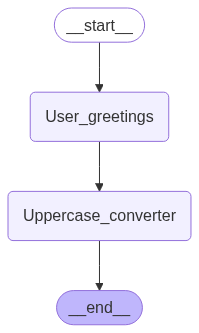

In [37]:
display_graph(app)

## Level 2 : Using an LLM and a function